In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 91% 149M/163M [00:01<00:00, 148MB/s]
100% 163M/163M [00:01<00:00, 145MB/s]


In [3]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

done


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import cv2 #for image processing
from google.colab.patches import cv2_imshow #creates new window and displays the image in that video
from PIL import Image #image processing
from sklearn.model_selection import train_test_split

In [5]:
with_mask_files=os.listdir('/content/data/with_mask')  #images of masked face
without_mask_files=os.listdir('/content/data/without_mask')  #images of unmasked face

In [19]:
print(type(with_mask_files))
print(with_mask_files[0:5])
print(without_mask_files[0:5])


<class 'list'>
['with_mask_2448.jpg', 'with_mask_1503.jpg', 'with_mask_2308.jpg', 'with_mask_1546.jpg', 'with_mask_3616.jpg']
['without_mask_3775.jpg', 'without_mask_2491.jpg', 'without_mask_1774.jpg', 'without_mask_1930.jpg', 'without_mask_48.jpg']


In [6]:
#printing no. of images
print('No. of masked images', len(with_mask_files))
print('No. of unmasked images', len(without_mask_files) )

No. of masked images 3725
No. of unmasked images 3828


### **Creating labels for the two class of images**

 with mask --> 1
 without mask --> 0

In [7]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [8]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# **Displaying the Images**

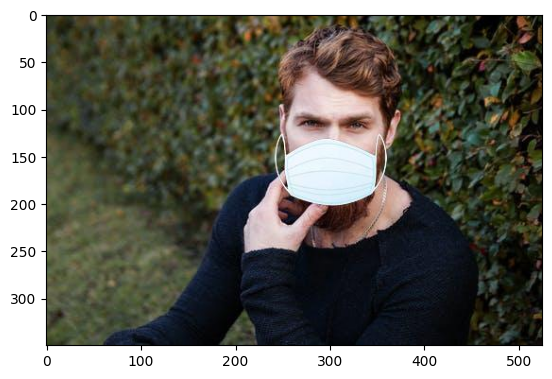

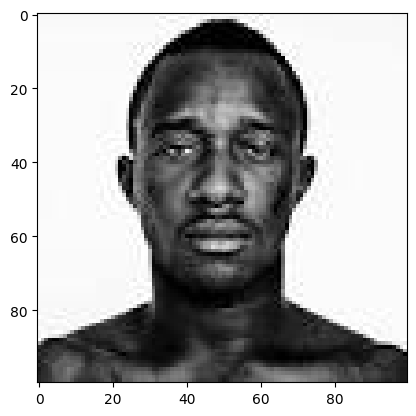

In [12]:
#displaying with mask img
img=mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot=plt.imshow(img)
plt.show()
#displaying without mask img
img=mpimg.imread('/content/data/without_mask/without_mask_1.jpg')
imgplot=plt.imshow(img)
plt.show()

# **Image Processing**

1. Resize images
2. Convert the images to numpy arrays

In [22]:
#convert images to numpy arrays
data=[]
with_mask_path='/content/data/with_mask/'
without_mask_path='/content/data/without_mask/'

# For with mask images
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file) #/content/data/with_mask/with_mask_2448.jpg
  image=image.resize((128,128))  # resizing image
  image=image.convert('RGB') #converting to RGB
  image=np.array(image) #converting to numpy array
  if image.shape==(128,128,3):
    data.append(image)

# For without mask images
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file) #/content/data/with_mask/with_mask_2448.jpg
  image=image.resize((128,128))  # resizing image
  image=image.convert('RGB') #converting to RGB
  image=np.array(image) #converting to numpy array
  if image.shape==(128,128,3):
    data.append(image)


In [26]:
print(type(data))
print(len(data))
print(data[0].shape)
print(data[0])
print(type(data[0]))


<class 'list'>
7553
(128, 128, 3)
[[[189 182 174]
  [190 183 175]
  [190 183 175]
  ...
  [175 171 162]
  [173 169 160]
  [170 166 157]]

 [[190 183 175]
  [190 183 175]
  [190 183 175]
  ...
  [174 170 161]
  [173 169 160]
  [171 167 158]]

 [[191 184 176]
  [191 184 176]
  [192 185 177]
  ...
  [174 170 161]
  [173 169 160]
  [172 168 159]]

 ...

 [[ 84  96 107]
  [ 69  80  94]
  [ 61  76  92]
  ...
  [ 27  36  43]
  [ 23  33  37]
  [ 15  25  27]]

 [[ 69  84  98]
  [ 61  75  91]
  [ 52  69  85]
  ...
  [ 25  33  39]
  [ 20  29  33]
  [ 12  21  24]]

 [[ 60  77  93]
  [ 54  71  87]
  [ 46  63  79]
  ...
  [ 24  31  37]
  [ 19  26  31]
  [ 14  22  25]]]
<class 'numpy.ndarray'>


In [27]:
# convert image list and label list to numpy arrays

X=np.array(data)
Y=np.array(labels)

In [36]:
print(X)

[[[[189 182 174]
   [190 183 175]
   [190 183 175]
   ...
   [175 171 162]
   [173 169 160]
   [170 166 157]]

  [[190 183 175]
   [190 183 175]
   [190 183 175]
   ...
   [174 170 161]
   [173 169 160]
   [171 167 158]]

  [[191 184 176]
   [191 184 176]
   [192 185 177]
   ...
   [174 170 161]
   [173 169 160]
   [172 168 159]]

  ...

  [[ 84  96 107]
   [ 69  80  94]
   [ 61  76  92]
   ...
   [ 27  36  43]
   [ 23  33  37]
   [ 15  25  27]]

  [[ 69  84  98]
   [ 61  75  91]
   [ 52  69  85]
   ...
   [ 25  33  39]
   [ 20  29  33]
   [ 12  21  24]]

  [[ 60  77  93]
   [ 54  71  87]
   [ 46  63  79]
   ...
   [ 24  31  37]
   [ 19  26  31]
   [ 14  22  25]]]


 [[[255 255 255]
   [254 254 254]
   [255 255 255]
   ...
   [152 147 151]
   [155 150 151]
   [160 155 153]]

  [[255 255 255]
   [254 254 254]
   [255 255 255]
   ...
   [164 154 159]
   [172 163 166]
   [177 168 167]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [154 144 150]
   [169 159 162]
   [175 166

In [28]:
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7553, 128, 128, 3)
(7553,)


# **Train-Test Split**

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [32]:
print(X.shape)
print(Y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7553, 128, 128, 3)
(7553,)
(6042, 128, 128, 3)
(6042,)
(1511, 128, 128, 3)
(1511,)


In [33]:
# Scaling data
X_train=X_train/255
X_test=X_test/255

In [39]:

print(X_train[0])

[[[0.43921569 0.41568627 0.43137255]
  [0.43137255 0.40784314 0.42352941]
  [0.41568627 0.38823529 0.40392157]
  ...
  [0.23921569 0.27843137 0.31372549]
  [0.21568627 0.25490196 0.29019608]
  [0.20392157 0.24313725 0.27843137]]

 [[0.44705882 0.42352941 0.43921569]
  [0.43529412 0.41176471 0.42745098]
  [0.40392157 0.38039216 0.39607843]
  ...
  [0.24313725 0.28235294 0.31764706]
  [0.21176471 0.25098039 0.29019608]
  [0.2        0.23921569 0.2745098 ]]

 [[0.4        0.37647059 0.39607843]
  [0.38039216 0.36078431 0.37647059]
  [0.3372549  0.3254902  0.34117647]
  ...
  [0.24705882 0.28627451 0.31764706]
  [0.20784314 0.25098039 0.28235294]
  [0.19215686 0.23529412 0.26666667]]

 ...

 [[0.94901961 0.94509804 0.96470588]
  [0.94117647 0.94117647 0.95686275]
  [0.9254902  0.9254902  0.94117647]
  ...
  [0.85882353 0.81176471 0.78431373]
  [0.86666667 0.82745098 0.8       ]
  [0.87058824 0.83529412 0.80784314]]

 [[0.94117647 0.93333333 0.95294118]
  [0.9372549  0.93333333 0.95294118]


# **Building a Convolution Nueral Network (CNN)**


In [41]:
  import tensorflow as tf
  from tensorflow import keras
  from keras.models import Sequential
  from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [64]:
num_of_classes=2

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128  ,activation='relu'))
model.add(Dropout(0.5) )

model.add(Dense(64  ,activation='relu'))
model.add(Dropout(0.5) )
model.add(Dense(num_of_classes,activation='sigmoid'))


In [47]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
# training the model
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test),validation_split=0.2)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.6958 - loss: 0.6958 - val_accuracy: 0.8729 - val_loss: 0.2847
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8786 - loss: 0.3096 - val_accuracy: 0.9113 - val_loss: 0.2282
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9067 - loss: 0.2371 - val_accuracy: 0.9186 - val_loss: 0.2151
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9281 - loss: 0.1895 - val_accuracy: 0.9226 - val_loss: 0.2144
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9372 - loss: 0.1618 - val_accuracy: 0.9358 - val_loss: 0.1862
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9476 - loss: 0.1350 - val_accuracy: 0.9292 - val_loss: 0.1968
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9585 - loss: 0.1183 - val_accuracy: 0.9325 - val_loss: 0.2305
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9704 - loss: 0.0859 - val_acc

# **Model Evaluation**

In [67]:
loss,accuracy=model.evaluate(X_test,Y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9399 - loss: 0.2192
Test Accuracy = 0.9404367804527283


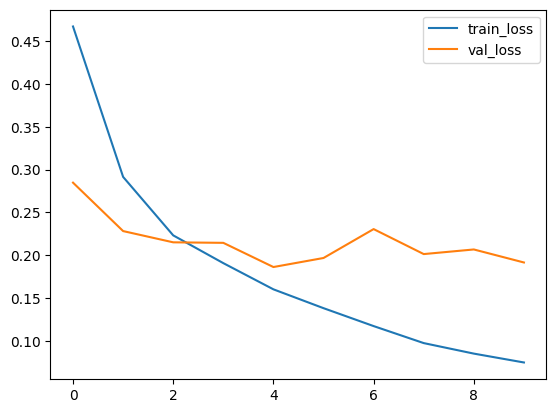

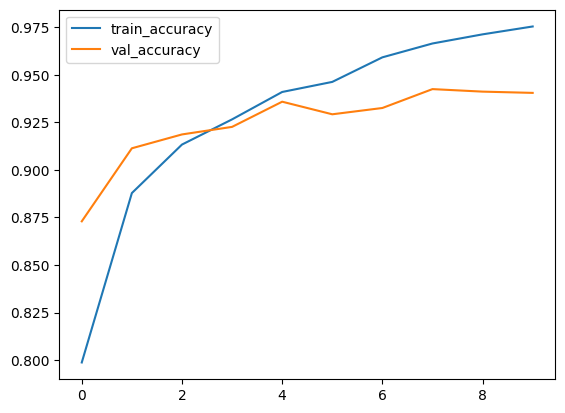

In [70]:
h=history
# plotting the loss value
plt.plot(h.history['loss'],label='train_loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

#plotting the accuracy value
plt.plot(h.history['accuracy'],label='train_accuracy')
plt.plot(h.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


# **Predictive System**

Path of the image to be tested:/content/maskedImage.jpg


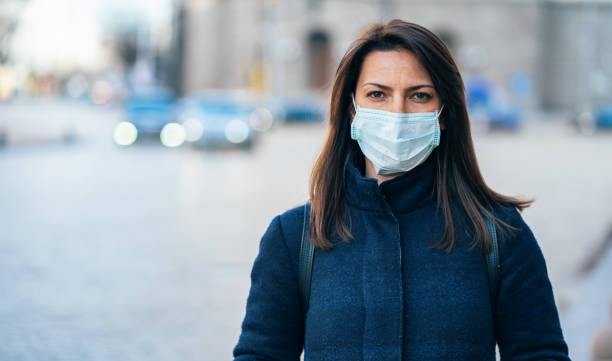

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.17127088 0.94033337]]
1
The person in the image is wearing a mask


In [77]:
input_image_path=input('Path of the image to be tested:')

input_image= cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])

prediction=model.predict(input_image_reshaped)
print(prediction)


input_image_label=np.argmax(prediction)
print(input_image_label)

if input_image_label==1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')